### Time Series Preparation: Synthesizing working with date type objects in conjunction with preprocessing efforts in pandas :)

In [40]:
# tabular data imports
import numpy as np
import pandas as pd
# quiet in the library
import warnings
warnings.filterwarnings('ignore')
from acquire import get_store_item_demand_data

from datetime import datetime

In [41]:
# step one for preparation: make sure we can acquire the data!
df = get_store_item_demand_data()

In [42]:
df.head(2)

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### Summarize:
 - Ensure that we have no null values in our data set
 - (if we do, clean them via dropping or imputation)
 - contextualize the shape of our data

In [43]:
#  run basis synopsis: info, describe, shape

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store_id       913000 non-null  int64  
 5   store_address  913000 non-null  object 
 6   store_city     913000 non-null  object 
 7   store_state    913000 non-null  object 
 8   store_zipcode  913000 non-null  int64  
 9   item_brand     913000 non-null  object 
 10  item_name      913000 non-null  object 
 11  item_price     913000 non-null  float64
 12  item_upc12     913000 non-null  int64  
 13  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


In [45]:
df.shape

(913000, 14)

In [46]:
df.describe()

,item_id,sale_amount,sale_id,store_id,store_zipcode,item_price,item_upc12,item_upc14
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,9.130000e+05,9.130000e+05
mean,25.500000,52.250287,456500.500000,5.500000,78224.800000,5.160400,2.384688e+11,2.384688e+11
std,14.430878,28.801144,263560.542224,2.872283,16.479087,2.737764,2.978005e+11,2.978005e+11
min,1.000000,0.000000,1.000000,1.000000,78201.000000,0.600000,8.500005e+09,8.500005e+09
25%,13.000000,30.000000,228250.750000,3.000000,78217.000000,2.970000,3.367410e+10,3.367410e+10
50%,25.500000,47.000000,456500.500000,5.500000,78220.500000,5.195000,7.103651e+10,7.103651e+10
75%,38.000000,70.000000,684750.250000,8.000000,78232.000000,7.520000,6.030842e+11,6.030842e+11
max,50.000000,231.000000,913000.000000,10.000000,78253.000000,9.640000,8.846237e+11,8.846237e+11


In [49]:
df.isnull().sum()[df.isnull().sum()] == 0

item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
item_id    True
dtype: bool

In [50]:
# what we know so far:
# - no missing information (that we know about!) yay!
# - items that range in price between 60c and ~$10
# 913000 rows of data (but we will contextualize what that means)
# we have date information, but it is currently not our index and not in pandas datetime object format

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

Column: item_id


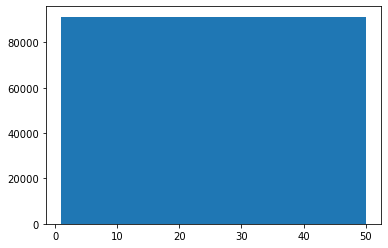

Column: sale_amount


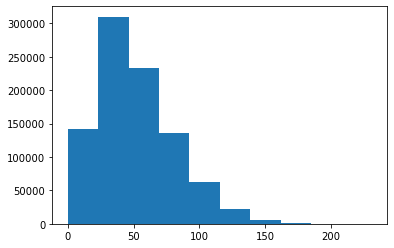

Column: sale_date


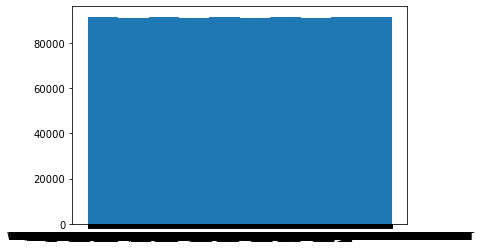

Column: sale_id


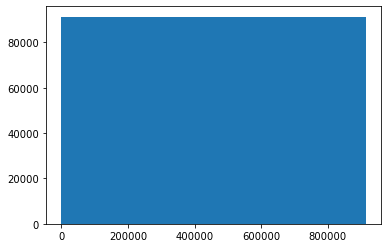

Column: store_id


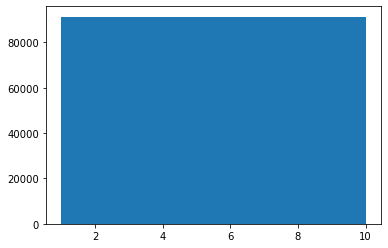

Column: store_address


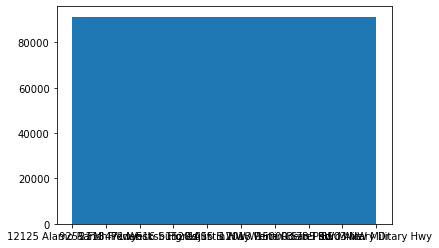

Column: store_city


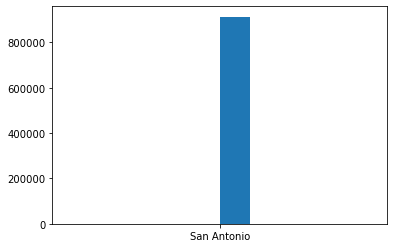

Column: store_state


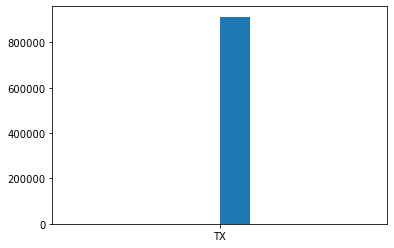

Column: store_zipcode


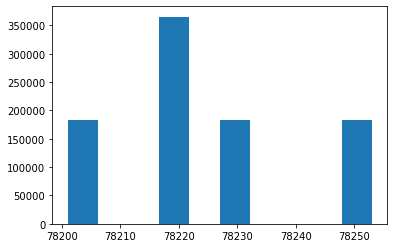

Column: item_brand


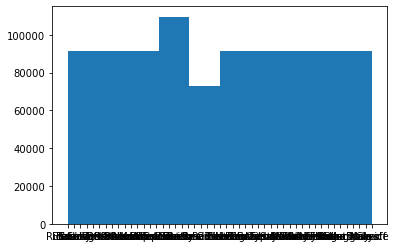

Column: item_name


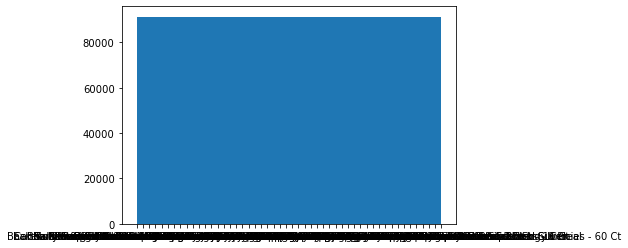

Column: item_price


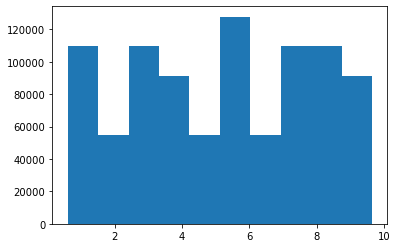

Column: item_upc12


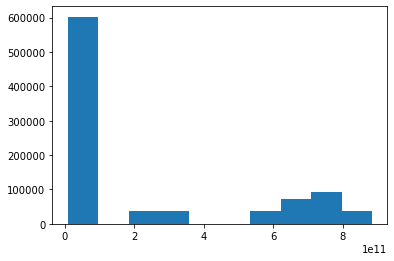

Column: item_upc14


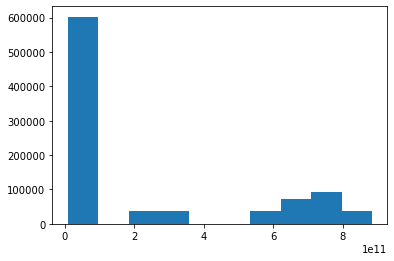

In [52]:
# univariate analysis of columns:
for col in df.columns:
    print('Column: ' + col)
    plt.hist(df[col])
    plt.show()

### Further summary: what do our dates look like?

In [53]:
df.columns

Index(['item_id', 'sale_amount', 'sale_date', 'sale_id', 'store_id',
       'store_address', 'store_city', 'store_state', 'store_zipcode',
       'item_brand', 'item_name', 'item_price', 'item_upc12', 'item_upc14'],
      dtype='object')

In [54]:
df['sale_date']

0         Tue, 01 Jan 2013 00:00:00 GMT
1         Wed, 02 Jan 2013 00:00:00 GMT
2         Thu, 03 Jan 2013 00:00:00 GMT
3         Fri, 04 Jan 2013 00:00:00 GMT
4         Sat, 05 Jan 2013 00:00:00 GMT
                      ...              
912995    Wed, 27 Dec 2017 00:00:00 GMT
912996    Thu, 28 Dec 2017 00:00:00 GMT
912997    Fri, 29 Dec 2017 00:00:00 GMT
912998    Sat, 30 Dec 2017 00:00:00 GMT
912999    Sun, 31 Dec 2017 00:00:00 GMT
Name: sale_date, Length: 913000, dtype: object

In [55]:
df.sale_date.min(), df.sale_date.max()

('Fri, 01 Apr 2016 00:00:00 GMT', 'Wed, 31 May 2017 00:00:00 GMT')

In [56]:
# couple takeaways here: 
#  - make sure those time stamps dont mean anything
#  - turn the strings into pandas datetimes
#  - analyze the true time window (min/max)

In [57]:
# looking into previous suspicions:
#  - is this a dataframe of unique item/store combinations?

In [59]:
df.sale_date.value_counts()

Thu, 17 Jul 2014 00:00:00 GMT    500
Tue, 26 Jul 2016 00:00:00 GMT    500
Fri, 12 Aug 2016 00:00:00 GMT    500
Sat, 10 Jun 2017 00:00:00 GMT    500
Mon, 18 Mar 2013 00:00:00 GMT    500
                                ... 
Mon, 09 Nov 2015 00:00:00 GMT    500
Tue, 21 Jan 2014 00:00:00 GMT    500
Mon, 22 Jun 2015 00:00:00 GMT    500
Wed, 15 Jul 2015 00:00:00 GMT    500
Sat, 24 Oct 2015 00:00:00 GMT    500
Name: sale_date, Length: 1826, dtype: int64

In [61]:
df.columns

Index(['item_id', 'sale_amount', 'sale_date', 'sale_id', 'store_id',
       'store_address', 'store_city', 'store_state', 'store_zipcode',
       'item_brand', 'item_name', 'item_price', 'item_upc12', 'item_upc14'],
      dtype='object')

In [ ]:
# dataframe size: 913000

In [64]:
df.sale_date.nunique(), df.item_id.nunique(), df.sale_id.nunique(), df.store_id.nunique()

(1826, 50, 913000, 10)

In [65]:
df.sale_date.nunique() * df.item_id.nunique() * df.store_id.nunique()

913000

In [66]:
# established:
# each row is an instance of a specific item being sold in a specific store on a specific day

### Fix our dates:
 - based on our previous value counts, looked like the time stamp didnt mean anything.  Is this right?
 - Fix formatting if thats the case
 - turn it into a datetime
 - set it as the index

In [68]:
pd.to_datetime(df.sale_date)

0        2013-01-01 00:00:00+00:00
1        2013-01-02 00:00:00+00:00
2        2013-01-03 00:00:00+00:00
3        2013-01-04 00:00:00+00:00
4        2013-01-05 00:00:00+00:00
                    ...           
912995   2017-12-27 00:00:00+00:00
912996   2017-12-28 00:00:00+00:00
912997   2017-12-29 00:00:00+00:00
912998   2017-12-30 00:00:00+00:00
912999   2017-12-31 00:00:00+00:00
Name: sale_date, Length: 913000, dtype: datetime64[ns, UTC]

In [67]:
df.head(2)

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [69]:
# establish a base of comparison:
date1 = 'Tue, 01 Jan 2013 00:00:00 GMT'

In [71]:
date1[-13:]

' 00:00:00 GMT'

In [73]:
len([date for date in df['sale_date'] if not date.endswith(' 00:00:00 GMT')]) == 0

True

In [74]:
df['sale_date'] = df['sale_date'].apply(lambda date: date[:-13])

In [75]:
df[['sale_date']].head(2)

,sale_date
0,"Tue, 01 Jan 2013"
1,"Wed, 02 Jan 2013"


In [76]:
# cast it into a datetime
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [77]:
# alternate strat: pd.to_datetime(df.sale_date).dt.date)
# implication: datetime object works slightly differently than pandas timestamp
# alternate strat 2: use strftime to get just the date
# consequence: not super useful, its just a string

In [78]:
#  last step for date formatting: reassign index and ensure sorting

In [79]:
df = df.set_index('sale_date').sort_index()

In [81]:
df.head(1)

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store_id       913000 non-null  int64  
 4   store_address  913000 non-null  object 
 5   store_city     913000 non-null  object 
 6   store_state    913000 non-null  object 
 7   store_zipcode  913000 non-null  int64  
 8   item_brand     913000 non-null  object 
 9   item_name      913000 non-null  object 
 10  item_price     913000 non-null  float64
 11  item_upc12     913000 non-null  int64  
 12  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ MB


In [85]:
by_date = df.groupby(['sale_date']).sale_amount.sum().reset_index()

In [86]:
by_date

,sale_date,sale_amount
0,2013-01-01,13696.0
1,2013-01-02,13678.0
2,2013-01-03,14488.0
3,2013-01-04,15677.0
4,2013-01-05,16237.0
...,...,...
1821,2017-12-27,20378.0
1822,2017-12-28,21885.0
1823,2017-12-29,23535.0
1824,2017-12-30,24988.0


<AxesSubplot:xlabel='sale_date'>

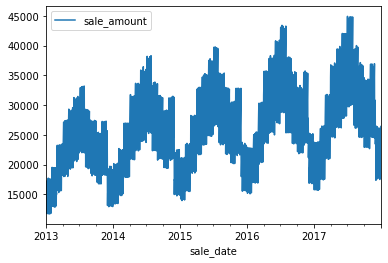

In [87]:
by_date.plot(x='sale_date', y='sale_amount')

In [90]:
# are items equally represented across the board?
df.item_id.value_counts().sort_index().nunique()

1

In [91]:
# I'm presuming this is reflective across stores as well
# let's see:
if df.store_id.value_counts().sort_index().nunique() == 1:
    print('stores equally represented')

stores equally represented


In [92]:
df.store_id.value_counts()

1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: store_id, dtype: int64

Takeaways so far:
50 items, 1826 dates, 10 stores:

 - what was the first sale date for each item?

In [93]:
first_sale = df.reset_index().groupby(['store_id', 'item_id']).sale_date.min()
first_sale.head()

store_id  item_id
1         1         2013-01-01
          2         2013-01-01
          3         2013-01-01
          4         2013-01-01
          5         2013-01-01
Name: sale_date, dtype: datetime64[ns]

In [95]:
first_sale.unique()

array(['2013-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# takeaway: each unique item/store combo starts on 1/1/13

In [96]:
last_sale = df.reset_index().groupby(['store_id', 'item_id']).sale_date.max()
last_sale.head()

store_id  item_id
1         1         2017-12-31
          2         2017-12-31
          3         2017-12-31
          4         2017-12-31
          5         2017-12-31
Name: sale_date, dtype: datetime64[ns]

In [97]:
last_sale.nunique() == 1

True

first sale date for every combo and last sale date for every combo match,
both are  1/1/2013 and 12/31/2017 respectively

In [98]:
days_per_store_per_item = df.reset_index().groupby(['store_id', 'item_id']).sale_date.nunique()

In [100]:
days_per_store_per_item.nunique() == 1

True

### We've established pretty clear certainty on how our data is represented, so let's do a final check for gaps in the data

In [102]:
n_days = df.index.max() - df.index.min() + pd.Timedelta('1d')

In [103]:
n_days

Timedelta('1826 days 00:00:00')

In [104]:
def prep_store(df):
    '''
    Take in acquired store data via API and establish 
    time as our index
    return: pandas dataframe with formatted timestamp
    '''#
    return df.assign(sale_date=pd.to_datetime(df.sale_date)).sort_values('sale_date').set_index('sale_date')

# Thought before moving into exploration:
How do we split data for time series analysis?
What makes it different?

In [105]:
# We will make a decision before fully modeling/analyzing/exploring

In [106]:
# Ideallly, our split should contain a full season's worth of data